# British Airways Customer Review

British Airways (BA) is the flag carrier airline of the United Kingdom (UK). Every day, thousands of BA flights arrive to and depart from the UK, carrying customers across the world. Whether it’s for holidays, work or any other reason, the end-to-end process of scheduling, planning, boarding, fuelling, transporting, landing, and continuously running flights on time, efficiently and with top-class customer service is a huge task with many highly important responsibilities.

In this project, I would be looking at the Customer feedback of British airways and try to get useful insight about their complaint and feelings. And see how it can be useful to the British Airways management.

The first thing to do will be to scrape review data from the web. For this, I would use a website called Skytrax. Once I have my dataset, I would need to prepare it. The data will be very messy and contain purely text. I will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, I should perform some analysis to uncover some insights. i would be doing a Sentimental analysis on the data set and making some visualisations to make things clear.

## Web scraping and analysis

We will use a package called `BeautifulSoup` to collect the data from the web. Once I have collected the data and saved it into a local `.csv` file I should start with my analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

Lets import the necessary libraries to scrap the data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
            
pages = 15
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews


In [32]:
BA_reviews = pd.DataFrame()
BA_reviews["reviews"] = reviews
BA_reviews.head()

NameError: name 'reviews' is not defined

In [6]:
df.to_csv("BA_reviews.csv")

Now we have our dataset for this task! The loops above collected 1500 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that I would do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [2]:
BA_reviews = pd.read_csv('BA_reviews.csv',index_col=0)
BA_reviews

,reviews
0,Not Verified | Everything was ok until our co...
1,Not Verified | My initial flight was cancelle...
2,Not Verified | We will never fly British Airw...
3,✅ Trip Verified | Check in and security cleara...
4,Not Verified | British Airways has confirmed ...
...,...
1495,✅ Verified Review | Krakow to London. Got us ...
1496,✅ Verified Review | Gatwick to Bridgetown. I ...
1497,✅ Verified Review | Dubai to London. Didn't h...
1498,✅ Verified Review | London Heathrow to Sofia....


Removing "Not Verified", basically anything before '|'

In [3]:
BA_reviews['reviews'] = BA_reviews['reviews'].apply(lambda x:x.split('|')[1:]) #splitting on '|' and returning anything after

In [4]:
BA_reviews

,reviews
0,[ Everything was ok until our connecting flig...
1,[ My initial flight was cancelled 8 hours pri...
2,[ We will never fly British Airways again. Ou...
3,[ Check in and security clearance very quick a...
4,[ British Airways has confirmed itself as the...
...,...
1495,[ Krakow to London. Got us there fine. My mai...
1496,[ Gatwick to Bridgetown. I managed to locate ...
1497,[ Dubai to London. Didn't have high expectati...
1498,[ London Heathrow to Sofia. Flight was on tim...


In [5]:
BA_reviews['reviews'] = BA_reviews['reviews'].apply(lambda x:"|".join(x))

In [6]:
BA_reviews

,reviews
0,Everything was ok until our connecting fligh...
1,My initial flight was cancelled 8 hours prio...
2,We will never fly British Airways again. Our...
3,Check in and security clearance very quick at...
4,British Airways has confirmed itself as the ...
...,...
1495,Krakow to London. Got us there fine. My main...
1496,Gatwick to Bridgetown. I managed to locate s...
1497,Dubai to London. Didn't have high expectatio...
1498,London Heathrow to Sofia. Flight was on time...


In [7]:
bar = BA_reviews

Lets do a .describe() on the dataset to get a quick summary of what we are working with. You can do a little more exploratory analysis if you want, like longest texts and all that. For me i would jump right into cleaning the data

In [8]:
bar.describe()

,reviews
count,1500
unique,1500
top,Everything was ok until our connecting fligh...
freq,1


In [9]:
bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1500 non-null   object
dtypes: object(1)
memory usage: 23.4+ KB


## Text Pre-processing

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words(referred to as stopwords e.g'the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the review column, then we can just use .apply() in pandas to process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in string library to get a quick list of all the possible punctuation:

In [10]:
import string


In [11]:
from nltk.corpus import stopwords

In [12]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    specific_stopwords = stopwords.words('english')+['ba','british','london','uk','airway',
                                        'airways','airline','airlines','review','airport','fly','flight'] 
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in specific_stopwords]                                      

Take not I added words like british, london, airways etc, because in a text data like this, you tend to see words like that alot and if not removed, they would be popping alot in our analysis and thats just unnecessary noise.

In [13]:
bar['review'] = bar['reviews'].apply(text_process)

In [14]:
bar.drop('reviews', axis = 1, inplace = True)

Now we have a clean list of words. However theres still more that can be done.
You would notice in texts, you tend to see words in their past tense, present tense, continuous tense, etc. things like 'go','going', 'went' they all practically mean the same thing but in different tense. The model would treat them as totally different words. so with an nltk library called Lemmatizer, we can break a word down to its root meaning to identify similarity.

In [15]:
bar

,review
0,"[Everything, ok, connecting, take, runway, pil..."
1,"[initial, cancelled, 8, hours, prior, automati..."
2,"[never, July, 15, 2023, LHR, LAX, cancelled, 2..."
3,"[Check, security, clearance, quick, LHR, T5, w..."
4,"[confirmed, worst, Last, minute, cancellation,..."
...,...
1495,"[Krakow, Got, us, fine, main, issue, food, ser..."
1496,"[Gatwick, Bridgetown, managed, locate, seats, ..."
1497,"[Dubai, Didnt, high, expectations, surprised, ..."
1498,"[Heathrow, Sofia, time, ground, service, smoot..."


In [16]:
from nltk.stem import wordnet
from nltk.stem.wordnet import WordNetLemmatizer


In [164]:
#pip install nltk

In [17]:
import nltk

In [169]:
#nltk.download('wordnet', download_dir='C:/Users/EBUKA ONUOHA/anaconda3/nltk_data')

[nltk_data] Downloading package wordnet to C:/Users/EBUKA
[nltk_data]     ONUOHA/anaconda3/nltk_data...


True

In [18]:
#Writing a function that would lemmatize the texts
def lament(sentence):
    wnl = WordNetLemmatizer()
    clean = []
    for word in sentence:
        clean.append(wnl.lemmatize(word.lower())) 
        
    return clean

In [19]:
bar['review'] = bar['review'].apply(lament)

In [20]:
bar

,review
0,"[everything, ok, connecting, take, runway, pil..."
1,"[initial, cancelled, 8, hour, prior, automatic..."
2,"[never, july, 15, 2023, lhr, lax, cancelled, 2..."
3,"[check, security, clearance, quick, lhr, t5, w..."
4,"[confirmed, worst, last, minute, cancellation,..."
...,...
1495,"[krakow, got, u, fine, main, issue, food, serv..."
1496,"[gatwick, bridgetown, managed, locate, seat, o..."
1497,"[dubai, didnt, high, expectation, surprised, b..."
1498,"[heathrow, sofia, time, ground, service, smoot..."


We now have a clean data set and we are ready to move on with the sentiment analysis

# Sentiment Analysis

Sentiment analysis is the process of analysing texts to determine if the emotional tone of the message is positive, negative or neutral. This is essential in this project because we need to know how the customers are feeling, are thry angry, are they happy with BA or not. This helps with that. 

The analysis can be done by several techniques, but the most common are with libraries called vader and text blob. Though vader is better suited for analysing text messages and informal messages like social media comments and tweets.

In [22]:
from nltk.sentiment import vader
import matplotlib.pyplot as plt
from collections import Counter

As part of the sentiment analysis, lets look at major topcs of discussion among the customers. We can do this by counting all the words in the entire body of text and get their frequency and see the most used words

In [23]:
words = []
for word in bar['review']: #making a list of the entire body of text
    words.extend(word)

In [24]:
len(words)

114251

In [25]:
word_counts = Counter(words)
top_10_words = word_counts.most_common(10)



We have counted the words and can see the most used words, seat, service, food, crew etc. As expected this just tells us most of the customers are talking about the aircraft seat, the food served, the service of the crew and so on

In [26]:
top_10_words

[('seat', 1482),
 ('service', 1197),
 ('time', 912),
 ('food', 802),
 ('crew', 785),
 ('hour', 779),
 ('class', 690),
 ('cabin', 686),
 ('good', 676),
 ('one', 667)]

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Let us visualise this word count with WordCloud, to display the most common words

In [68]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
bar['review(string)'] = bar['review'].apply(lambda x:' '.join(x)) #WordCloud needs a the entire body of text in string format

In [29]:
bar

,review,review(string)
0,"[everything, ok, connecting, take, runway, pil...",everything ok connecting take runway pilot cam...
1,"[initial, cancelled, 8, hour, prior, automatic...",initial cancelled 8 hour prior automatically r...
2,"[never, july, 15, 2023, lhr, lax, cancelled, 2...",never july 15 2023 lhr lax cancelled 20 hour d...
3,"[check, security, clearance, quick, lhr, t5, w...",check security clearance quick lhr t5 wife use...
4,"[confirmed, worst, last, minute, cancellation,...",confirmed worst last minute cancellation expla...
...,...,...
1495,"[krakow, got, u, fine, main, issue, food, serv...",krakow got u fine main issue food service sat ...
1496,"[gatwick, bridgetown, managed, locate, seat, o...",gatwick bridgetown managed locate seat offered...
1497,"[dubai, didnt, high, expectation, surprised, b...",dubai didnt high expectation surprised bland u...
1498,"[heathrow, sofia, time, ground, service, smoot...",heathrow sofia time ground service smooth howe...


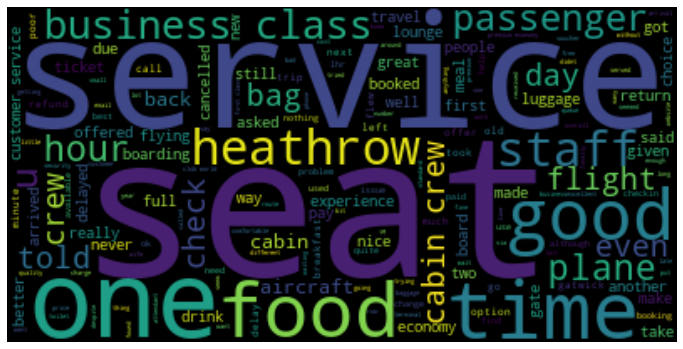

In [34]:
wordcloud = WordCloud(random_state=42).generate(' '.join(bar['review(string)']))

# Show the word cloud
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation= 'bilinear')

plt.axis("off")
plt.show()


In [35]:
#pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [34]:
#pip install --upgrade Pillow

  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\EBUKA ONUOHA\\anaconda3\\Lib\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Well it is not enough to just know the topics of discussion, lets try to find out exactly what is being said, whether it is positive or negative comments. We can do this with ngrams. Ngrams show the most common group of words used together, the N can be most common 2,3,4 or more words used together

In [53]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from nltk import ngrams
    


In [40]:
reviews = " ".join(bar['review(string)'])
corpus = reviews.split(" ")

In [59]:
def get_freq_dist(words,number_of_ngrams):
    ngramss = ngrams(words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngramss).most_common(30)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    
    return ax





<AxesSubplot:>

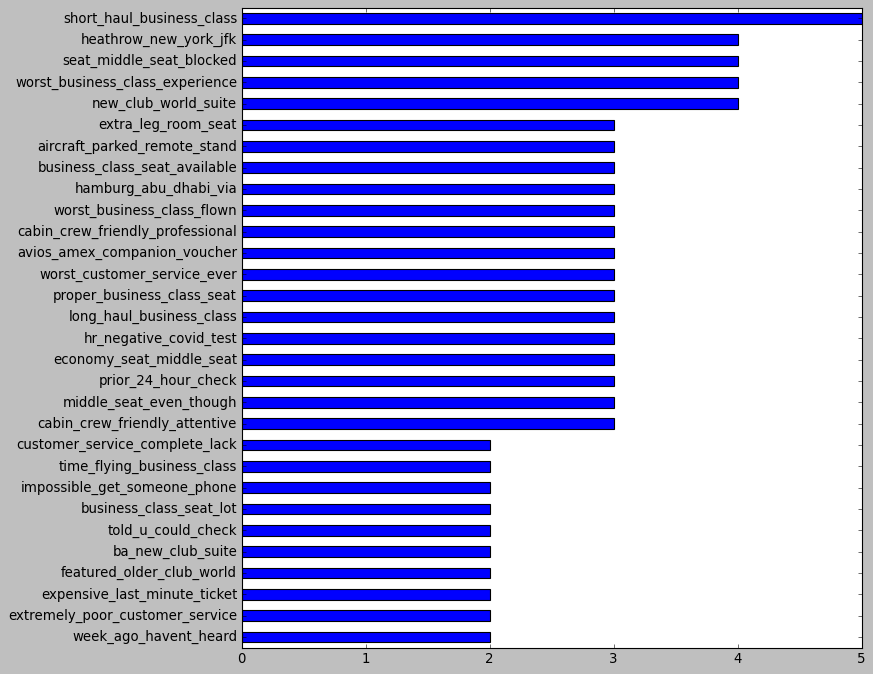

In [113]:
get_freq_dist(corpus,4)


Now we can see usefull phrases like "worst customer service ever","cabin crew friendly" etc, in summary you can already see people are complaining about the customer care, praising the cabin crew, complaining about the middle seat, etc

In [63]:
bar

,review,review(string)
0,"[everything, ok, connecting, take, runway, pil...",everything ok connecting take runway pilot cam...
1,"[initial, cancelled, 8, hour, prior, automatic...",initial cancelled 8 hour prior automatically r...
2,"[never, july, 15, 2023, lhr, lax, cancelled, 2...",never july 15 2023 lhr lax cancelled 20 hour d...
3,"[check, security, clearance, quick, lhr, t5, w...",check security clearance quick lhr t5 wife use...
4,"[confirmed, worst, last, minute, cancellation,...",confirmed worst last minute cancellation expla...
...,...,...
1495,"[krakow, got, u, fine, main, issue, food, serv...",krakow got u fine main issue food service sat ...
1496,"[gatwick, bridgetown, managed, locate, seat, o...",gatwick bridgetown managed locate seat offered...
1497,"[dubai, didnt, high, expectation, surprised, b...",dubai didnt high expectation surprised bland u...
1498,"[heathrow, sofia, time, ground, service, smoot...",heathrow sofia time ground service smooth howe...


Now lets go ahead to analysing the text with Vader. Vader takes in words, and based on the words which it has ascribed some level of emotion, it returns a score beteen -1 and 1. in which -1 is very negative sentiment and 1 is positive sentiment, the middle being a neutral sentiment

In [64]:
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

In [34]:
#nltk.download('vader_lexicon', download_dir='C:/Users/EBUKA ONUOHA/anaconda3/nltk_data')

[nltk_data] Downloading package vader_lexicon to C:/Users/EBUKA
[nltk_data]     ONUOHA/anaconda3/nltk_data...


True

In [65]:
bar['sentiment_vader'] = bar['review(string)'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound'])
    

In [66]:
bar

,review,review(string),sentiment_vader
0,"[everything, ok, connecting, take, runway, pil...",everything ok connecting take runway pilot cam...,-0.8454
1,"[initial, cancelled, 8, hour, prior, automatic...",initial cancelled 8 hour prior automatically r...,-0.8481
2,"[never, july, 15, 2023, lhr, lax, cancelled, 2...",never july 15 2023 lhr lax cancelled 20 hour d...,-0.6808
3,"[check, security, clearance, quick, lhr, t5, w...",check security clearance quick lhr t5 wife use...,0.9081
4,"[confirmed, worst, last, minute, cancellation,...",confirmed worst last minute cancellation expla...,-0.6249
...,...,...,...
1495,"[krakow, got, u, fine, main, issue, food, serv...",krakow got u fine main issue food service sat ...,0.1779
1496,"[gatwick, bridgetown, managed, locate, seat, o...",gatwick bridgetown managed locate seat offered...,0.9081
1497,"[dubai, didnt, high, expectation, surprised, b...",dubai didnt high expectation surprised bland u...,-0.8611
1498,"[heathrow, sofia, time, ground, service, smoot...",heathrow sofia time ground service smooth howe...,0.1280


Given the sentiment score of each customer review, we know which messages are possitive and which are negative and we can get a count and plot it

In [67]:
bar['sentiment_type(vader)'] = bar['sentiment_vader'].apply(
        lambda score: 'positive' if score > 0.1 else ('negative' if score < -0.1 else 'neutral'))


In [68]:
bar

,review,review(string),sentiment_vader,sentiment_type(vader)
0,"[everything, ok, connecting, take, runway, pil...",everything ok connecting take runway pilot cam...,-0.8454,negative
1,"[initial, cancelled, 8, hour, prior, automatic...",initial cancelled 8 hour prior automatically r...,-0.8481,negative
2,"[never, july, 15, 2023, lhr, lax, cancelled, 2...",never july 15 2023 lhr lax cancelled 20 hour d...,-0.6808,negative
3,"[check, security, clearance, quick, lhr, t5, w...",check security clearance quick lhr t5 wife use...,0.9081,positive
4,"[confirmed, worst, last, minute, cancellation,...",confirmed worst last minute cancellation expla...,-0.6249,negative
...,...,...,...,...
1495,"[krakow, got, u, fine, main, issue, food, serv...",krakow got u fine main issue food service sat ...,0.1779,positive
1496,"[gatwick, bridgetown, managed, locate, seat, o...",gatwick bridgetown managed locate seat offered...,0.9081,positive
1497,"[dubai, didnt, high, expectation, surprised, b...",dubai didnt high expectation surprised bland u...,-0.8611,negative
1498,"[heathrow, sofia, time, ground, service, smoot...",heathrow sofia time ground service smooth howe...,0.1280,positive


In [40]:
#pip install textblob

     ------------------------------------ 636.8/636.8 kB 231.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


Lets do an analysis with textBlob and compare

In [69]:
from textblob import TextBlob

In [70]:
bar['sentiment_blob'] = bar['review(string)'].apply(
    lambda review: TextBlob(review).sentiment.polarity)
    

In [71]:
bar

,review,review(string),sentiment_vader,sentiment_type(vader),sentiment_blob
0,"[everything, ok, connecting, take, runway, pil...",everything ok connecting take runway pilot cam...,-0.8454,negative,-0.153638
1,"[initial, cancelled, 8, hour, prior, automatic...",initial cancelled 8 hour prior automatically r...,-0.8481,negative,-0.074603
2,"[never, july, 15, 2023, lhr, lax, cancelled, 2...",never july 15 2023 lhr lax cancelled 20 hour d...,-0.6808,negative,-0.600000
3,"[check, security, clearance, quick, lhr, t5, w...",check security clearance quick lhr t5 wife use...,0.9081,positive,0.277706
4,"[confirmed, worst, last, minute, cancellation,...",confirmed worst last minute cancellation expla...,-0.6249,negative,-0.200000
...,...,...,...,...,...
1495,"[krakow, got, u, fine, main, issue, food, serv...",krakow got u fine main issue food service sat ...,0.1779,positive,0.166743
1496,"[gatwick, bridgetown, managed, locate, seat, o...",gatwick bridgetown managed locate seat offered...,0.9081,positive,0.089444
1497,"[dubai, didnt, high, expectation, surprised, b...",dubai didnt high expectation surprised bland u...,-0.8611,negative,-0.170667
1498,"[heathrow, sofia, time, ground, service, smoot...",heathrow sofia time ground service smooth howe...,0.1280,positive,0.022619


In [72]:
bar['sentiment_type(blob)'] = bar['sentiment_blob'].apply(
        lambda score: 'positive' if score > 0.1 else ('negative' if score < -0.1 else 'neutral'))


In [73]:
bar

,review,review(string),sentiment_vader,sentiment_type(vader),sentiment_blob,sentiment_type(blob)
0,"[everything, ok, connecting, take, runway, pil...",everything ok connecting take runway pilot cam...,-0.8454,negative,-0.153638,negative
1,"[initial, cancelled, 8, hour, prior, automatic...",initial cancelled 8 hour prior automatically r...,-0.8481,negative,-0.074603,neutral
2,"[never, july, 15, 2023, lhr, lax, cancelled, 2...",never july 15 2023 lhr lax cancelled 20 hour d...,-0.6808,negative,-0.600000,negative
3,"[check, security, clearance, quick, lhr, t5, w...",check security clearance quick lhr t5 wife use...,0.9081,positive,0.277706,positive
4,"[confirmed, worst, last, minute, cancellation,...",confirmed worst last minute cancellation expla...,-0.6249,negative,-0.200000,negative
...,...,...,...,...,...,...
1495,"[krakow, got, u, fine, main, issue, food, serv...",krakow got u fine main issue food service sat ...,0.1779,positive,0.166743,positive
1496,"[gatwick, bridgetown, managed, locate, seat, o...",gatwick bridgetown managed locate seat offered...,0.9081,positive,0.089444,neutral
1497,"[dubai, didnt, high, expectation, surprised, b...",dubai didnt high expectation surprised bland u...,-0.8611,negative,-0.170667,negative
1498,"[heathrow, sofia, time, ground, service, smoot...",heathrow sofia time ground service smooth howe...,0.1280,positive,0.022619,neutral


Lets visualise both vader and textblob analysis

In [74]:
sentiment_type_percentages_vader = bar['sentiment_type(vader)'].value_counts(normalize=True) * 100


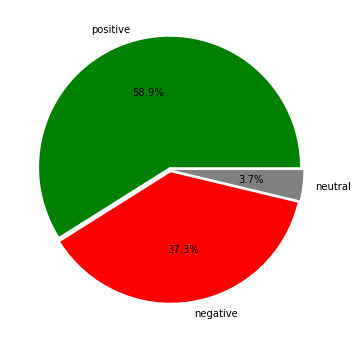

In [76]:

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(
    sentiment_type_percentages_vader,
    labels=sentiment_type_percentages_vader.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.02, 0.02, 0.02], 
    autopct='%1.1f%%'
    )
plt.show()


In [77]:
sentiment_type_percentages_blob = bar['sentiment_type(blob)'].value_counts(normalize=True) * 100


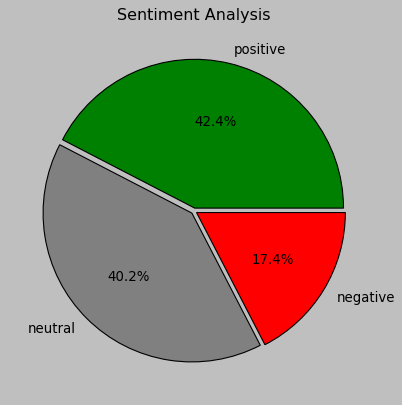

In [121]:
fig, ax = plt.subplots(figsize = (6,6))
ax.pie(
    sentiment_type_percentages_blob,
    labels=sentiment_type_percentages_blob.index, 
    colors=['green', 'grey', 'red'], 
    explode=[0.02, 0.02, 0.02], 
    autopct='%1.1f%%'
    )
plt.title('Sentiment Analysis')
plt.show()

Vader classifies more reviews as positive than textblob. Alot more fall in neutral in textblob than vader. if i were working further with this, i would rely on  text blob, because it seems to be more sensitive than vader and as i said before vader is best suited to informal texts

One more thing to do is the emotional analysis, i.e to find out the exact emotion felt in the entire body of text. To do this there is a text file provided that already have a dictionary of word with emotions ascribed to each one. Yoy can check out the file

In [79]:
emotion_list = [] #creating a list of emotions
#going through the text file
with open('emotions.txt', 'r') as file:
#removing the excess liine and punctuations from the text file    
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':') #separating the word from the emotion

        if word in words:  #basically saying if the word(from text file) is in my list of words(review), append the emotion to
            emotion_list.append(emotion) #to the list of emotiona above. this would give us the entire list of emotions from out review


In [80]:
emotion_list


[' cheated',
 ' attracted',
 ' happy',
 ' angry',
 ' angry',
 ' attracted',
 ' angry',
 ' esteemed',
 ' fearful',
 ' attached',
 ' embarrassed',
 ' attached',
 ' angry',
 ' powerless',
 ' sad',
 ' bored',
 ' fearless',
 ' happy',
 ' safe',
 ' adequate',
 ' powerless',
 ' fearful',
 ' fearless',
 ' attracted',
 ' cheated',
 ' happy',
 ' happy',
 ' fearful',
 ' happy',
 ' average',
 ' adequate',
 ' attracted',
 ' adequate',
 ' surprise',
 ' attached',
 ' cheated',
 ' powerless',
 ' happy',
 ' hated',
 ' angry',
 ' attracted',
 ' sad',
 ' attracted',
 ' belittled',
 ' sad',
 ' hated',
 ' loved',
 ' focused',
 ' demoralized',
 ' angry',
 ' sad',
 ' fearful',
 ' sad',
 ' anxious',
 ' sad',
 ' attracted',
 ' embarrassed',
 ' adequate',
 ' happy',
 ' loved',
 ' happy',
 ' fearful',
 ' ecstatic',
 ' ecstatic',
 ' happy',
 ' sad',
 ' focused',
 ' powerless',
 ' free',
 ' angry',
 ' angry',
 ' angry',
 ' happy',
 ' sad',
 ' happy',
 ' fearful',
 ' fearful',
 ' happy',
 ' sad',
 ' hated',
 ' happ

In [81]:
w = Counter(emotion_list)


In [82]:
w

Counter({' cheated': 4,
         ' attracted': 14,
         ' happy': 26,
         ' angry': 14,
         ' esteemed': 5,
         ' fearful': 15,
         ' attached': 8,
         ' embarrassed': 3,
         ' powerless': 8,
         ' sad': 21,
         ' bored': 3,
         ' fearless': 5,
         ' safe': 1,
         ' adequate': 8,
         ' average': 3,
         ' surprise': 3,
         ' hated': 8,
         ' belittled': 1,
         ' loved': 6,
         ' focused': 3,
         ' demoralized': 1,
         ' anxious': 6,
         ' ecstatic': 3,
         ' free': 2,
         ' entitled': 5,
         ' singled out': 5,
         ' apathetic': 2,
         ' lost': 1,
         ' obsessed': 2,
         ' alone': 2,
         ' independent': 2,
         ' codependent': 2,
         ' derailed': 1})

In [83]:
filtered_w = {a:b for a,b in w.items() if b >= 5} #removing irrelevant emotions

In [84]:
filtered_w

{' attracted': 14,
 ' happy': 26,
 ' angry': 14,
 ' esteemed': 5,
 ' fearful': 15,
 ' attached': 8,
 ' powerless': 8,
 ' sad': 21,
 ' fearless': 5,
 ' adequate': 8,
 ' hated': 8,
 ' loved': 6,
 ' anxious': 6,
 ' entitled': 5,
 ' singled out': 5}

Lets visualize this

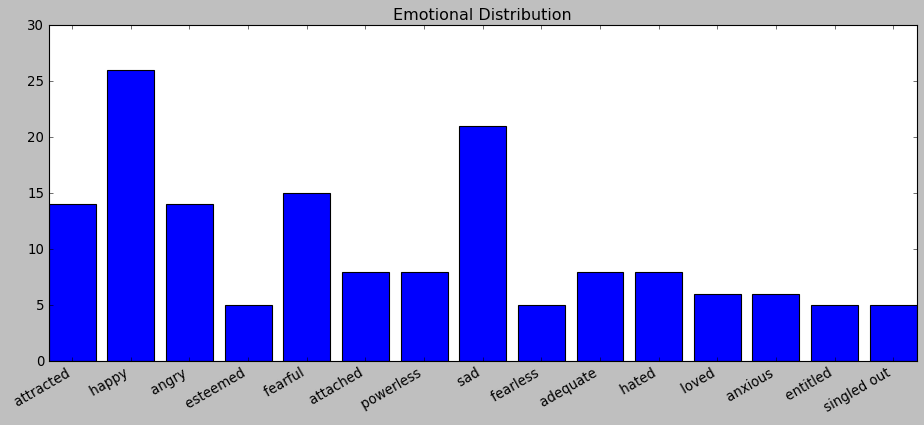

In [120]:
fig, ax1 = plt.subplots(figsize = (14,6))
plt.style.use('classic')

ax1.bar(filtered_w.keys(), filtered_w.values())
fig.autofmt_xdate()
plt.title('Emotional Distribution')

plt.show()

The most emotion felt here is happy, which is good but its not good enough that close to it are angry, sad, fearful. But to think of it, most people comr to customer review tp complain and vent about their experience, hardly do people just come to talk about how good their experiece was

More analysis can be done to get deeper insights like:

Now you have the table of the sentiment score, you can create a dataframe with scores maybe less than -0.2 to get just negative comments. with this you can do an ngram again to see what is said, or do a word count to see the the topics of discussion.

Another thing is to concat the the scores to the original reviews and get the top negative scores and fully read the reviews.
There are alot than can be explored.

With the little i did, i would advice BA management looks into the customer service and make them do better, also look into the seat arrangement of the plane, especially the middle lane. Hope this was helpful to your research, feel free to reach out if you have questions or contributions